In [ ]:
# Sites Referenced:

    # Medium Article: Making Heat Maps with Literal Maps: How to Use Python to Construct a Chloropleth
        # URL: https://towardsdatascience.com/making-heat-maps-with-literal-maps-how-to-use-python-to-construct-a-chloropleth-6b65e4e33905

    #Real Python Article: Combining Data in pandas With merge(), .join(), and concat()
        # URL: https://realpython.com/pandas-merge-join-and-concat/
        
    #Geopandas Tools Page
        #https://geopandas.org/en/stable/docs/reference/api/geopandas.points_from_xy.html
        
    #Lab 11: Leafmap
        #https://geog-312.gishub.org/lectures/11_leafmap/

In [1]:
# import relevant packages
import pandas as pd

!pip install leafmap
import leafmap

!pip install geopandas
import geopandas as gpd

import matplotlib.pyplot as plt

In [2]:
# import csv file - point data from Sex Offender Registry in Tennessee, 2022, January and Febuary
offender_registry_points = pd.read_csv("January.csv")

# import county boundaries - shapefile data
county_boundaries = gpd.read_file("/Users/elliebernstein/Downloads/cb_2022_47_cousub_500k/cb_2022_47_cousub_500k.shp")

#import csv file - population data by county
population_density_data = pd.read_csv("population_density01 - Sheet1-2.csv")

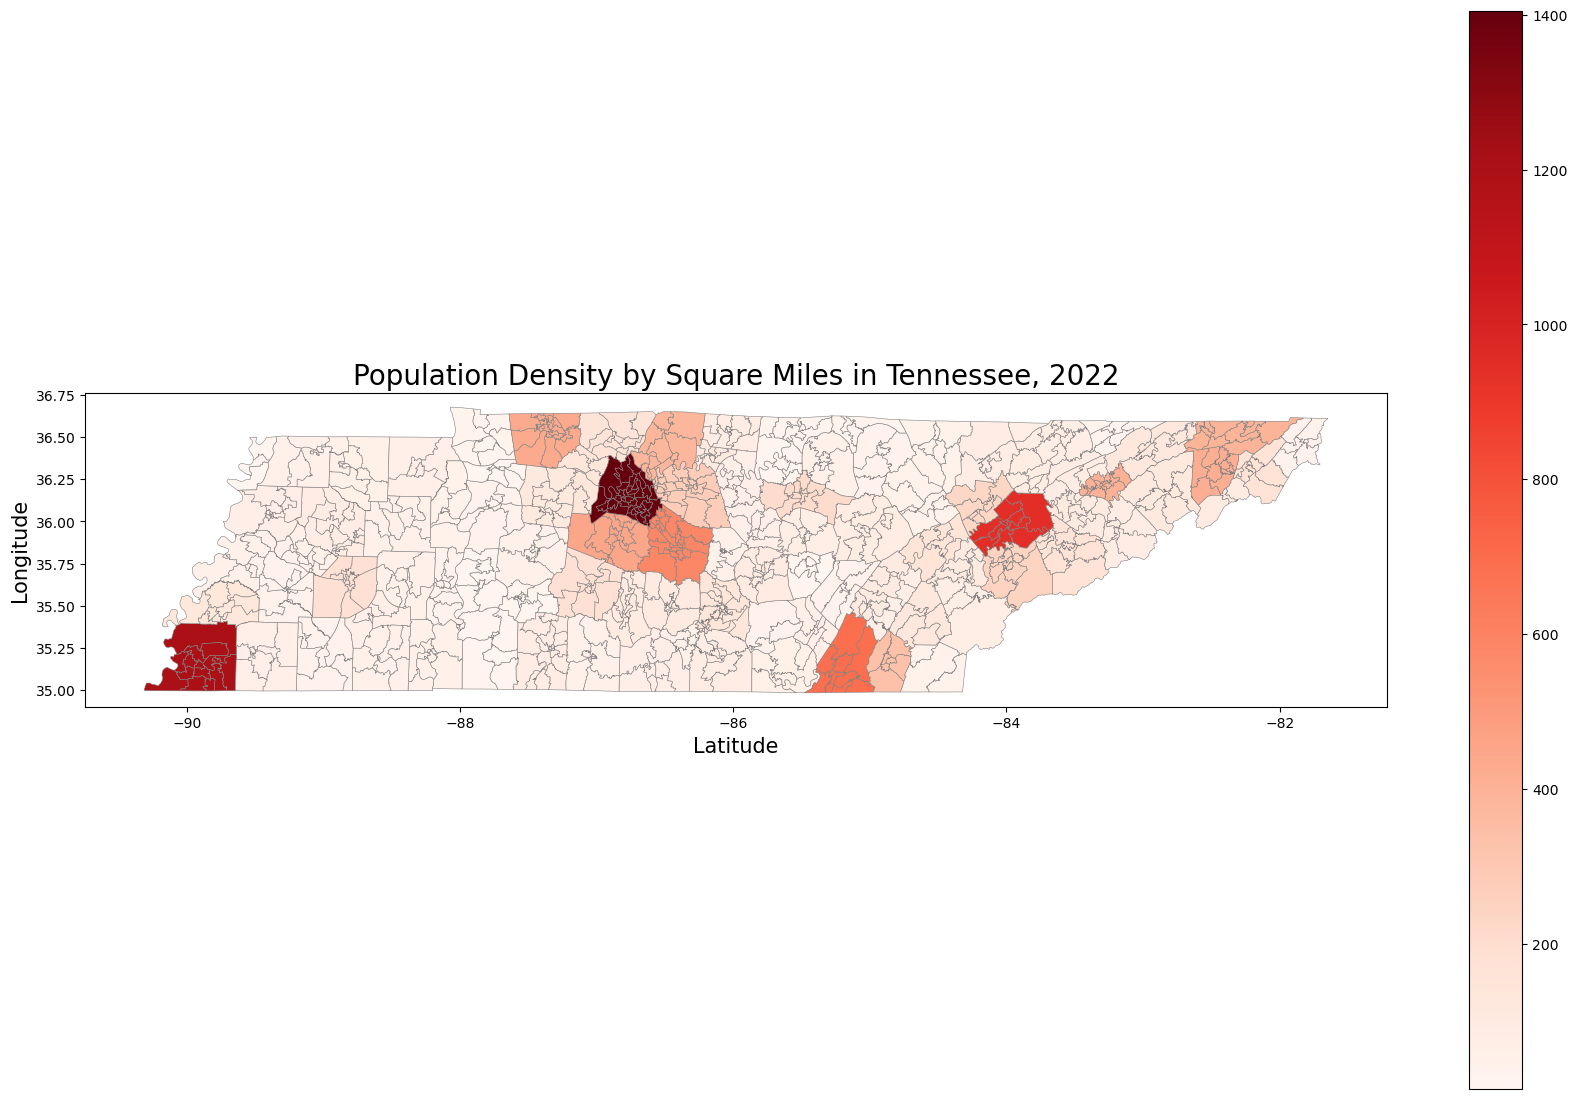

In [3]:
# merge data from county boundaries and population density
merge_boundaries_and_points = pd.merge(county_boundaries, population_density_data, left_on = 'NAMELSADCO', right_on = 'County_Name', how = 'left')

# create map
fig, ax = plt.subplots(1, figsize = (21,14))
merge_boundaries_and_points.plot(column = 'Population_Density_by_Square_Miles', cmap = 'Reds', linewidth = 0.4, ax = ax, edgecolor = 'gray', legend=True)
ax.set_title('Population Density by Square Miles in Tennessee, 2022', fontsize = 20)
plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Longitude', fontsize = 15)
plt.show()

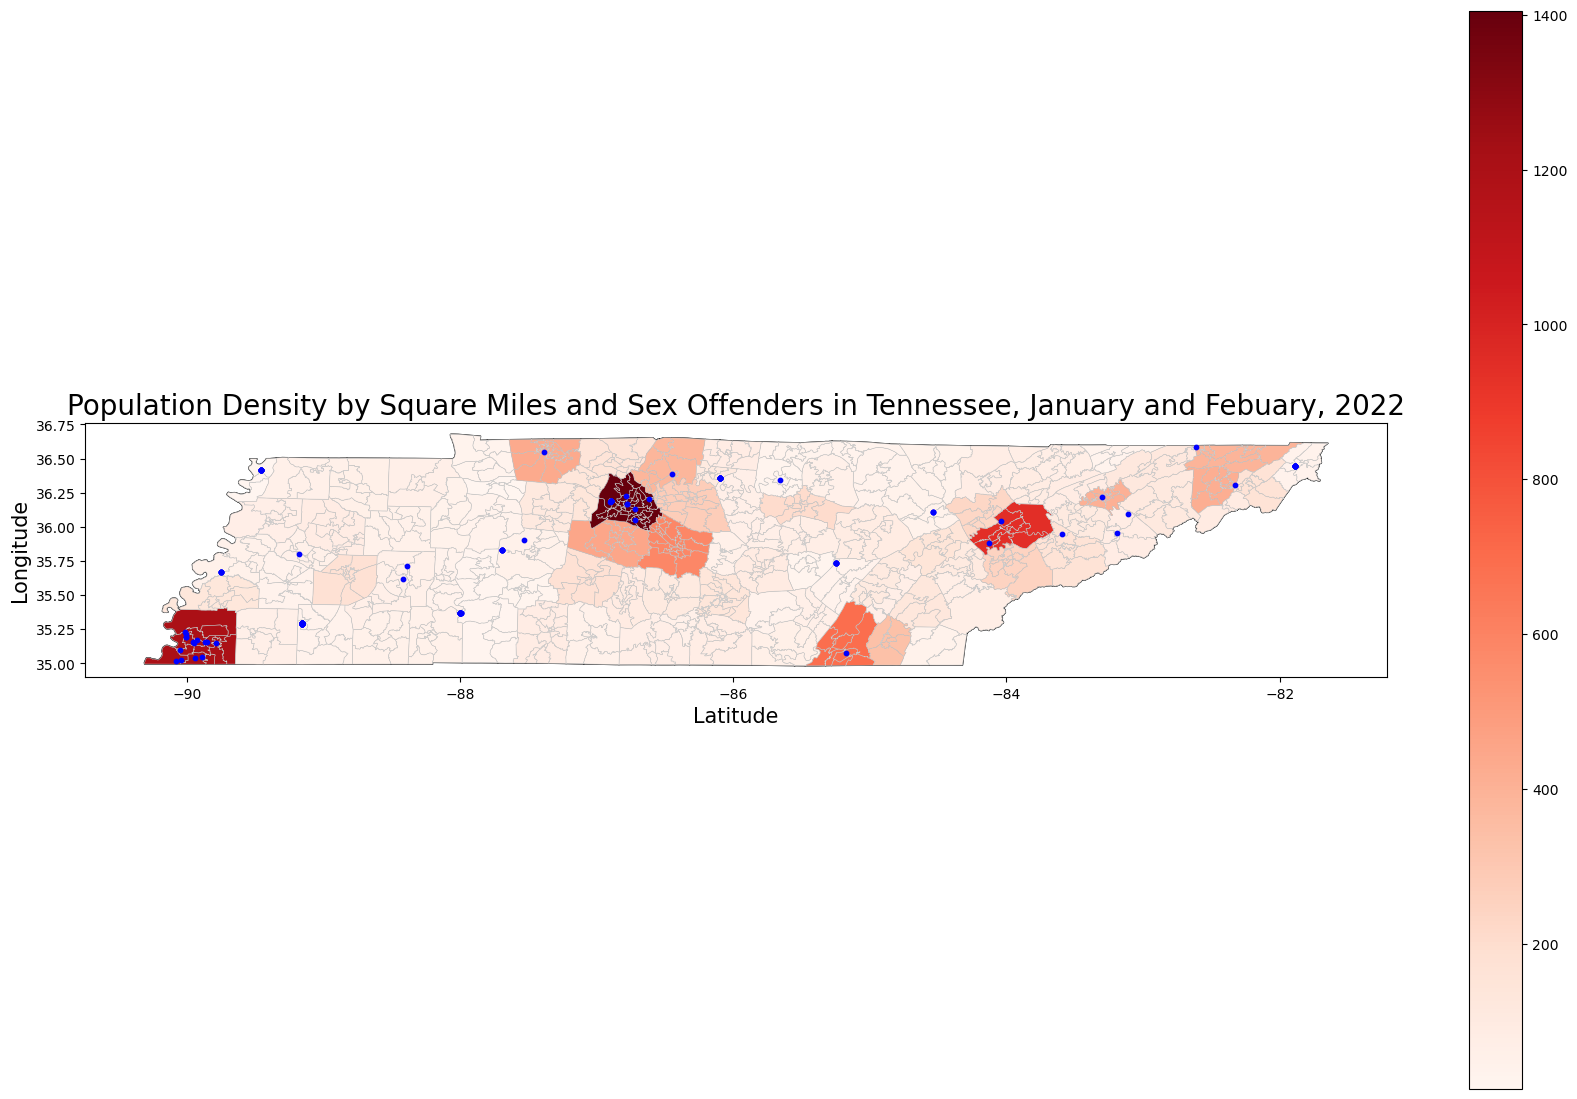

In [4]:
# plot sex offender point data onto heatmap

# find latitude and longitude
geometry_points = gpd.points_from_xy(offender_registry_points['longitude_primary'], offender_registry_points['latitude_primary'])
point_gdf = gpd.GeoDataFrame(offender_registry_points, geometry = geometry_points)

# make map
fig, ax = plt.subplots(1, figsize = (21, 14))
county_boundaries.plot(ax = ax, edgecolor ='black')

# add point data
merge_boundaries_and_points.plot(column = 'Population_Density_by_Square_Miles', cmap = 'Reds', linewidth = 0.4, ax = ax, edgecolor = '0.8', legend = True)

# plot the point data on top of the heatmap
point_gdf.plot(ax = ax, color = 'blue', marker = 'o', markersize = 10)

# exrta map features
ax.set_title('Population Density by Square Miles and Sex Offenders in Tennessee, January and Febuary, 2022', fontsize = 20)
plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Longitude', fontsize = 15)
plt.show()